# 2.4: Fundamentals of Visualization Libraries Part 2 Task
* Import Libraries and Dataframe
* Top 20 Starting Stations Frequencies Bar Chart and Theme Selection
* Dual-Axis Line Plot
* Box plots
* FacetGrids

# Import Libraries

In [3]:
# Import Libraries
import pandas as pd
import matplotlib 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime as dt

In [4]:
# DataFrame is imported
df = pd.read_csv('new_york_data.csv', index_col = 0)

C:\Users\User\AppData\Local\Temp\ipykernel_2608\1684658638.py:2: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('new_york_data.csv', index_col = 0)


In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,-6.0,both
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,1.6,both
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,-2.3,both
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,1.4,both
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,-5.9,both


In [6]:
df.shape

(12000000, 16)

In [7]:
# A general overview of the DataFrame colums is performed 
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [8]:
# A revision for the data type.
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
_merge                 object
dtype: object

# Top 20 Starting Stations Frequencies Bar Chart and Theme Selection

In [10]:
df['value'] = 1
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [11]:
top20 = df_t.nlargest(20, 'value')
top20

,start_station_name,value
1587,W 21 St & 6 Ave,52629
8,1 Ave & E 68 St,48603
495,Broadway & W 58 St,45270
1718,West St & Chambers St,44562
286,6 Ave & W 33 St,41279
1511,University Pl & E 14 St,39656
788,E 33 St & 1 Ave,38674
463,Broadway & E 21 St,38310
461,Broadway & E 14 St,38197
485,Broadway & W 25 St,37979


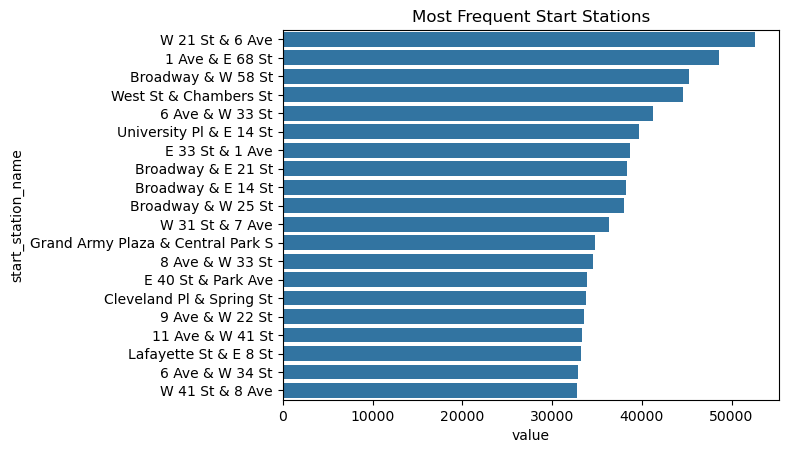

In [12]:
# Top 20 BarPlot
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Most Frequent Start Stations")
plt.show()

# Dual-Axis Line Plot

In [14]:
df.shape

(12000000, 17)

In [15]:
df = df.dropna(subset=['avgTemp'])

In [16]:
# The column _merge will be droped as it's of no use.
df.drop(columns = {'_merge'}, inplace = True)

In [17]:
df.shape

(11999379, 16)

In [18]:
# We can observe that the Date column is anf object type
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
value                   int64
dtype: object

In [19]:
# The data type for the column 'date' is transformed into a date type format
df['date'] = pd.to_datetime(df['date'])

In [20]:
# A revision for the new data type.
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
value                          int64
dtype: object

In [21]:
df.sort_values(by='date')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,value
321985,0044426DB3E6941C,classic_bike,2022-01-01 12:01:54.015,2022-01-01 12:11:58.322,E 33 St & 1 Ave,6197.08,E 33 St & 1 Ave,6197.08,40.743227,-73.974498,40.743227,-73.974498,member,2022-01-01,11.6,1
239146,7E230F94AD0041EB,classic_bike,2022-01-01 01:41:23.320,2022-01-01 01:46:04.352,W 21 St & 6 Ave,6140.05,Hudson St & W 13 St,6115.06,40.741740,-73.994156,40.740057,-74.005274,casual,2022-01-01,11.6,1
863849,8CDC7F9907659E52,electric_bike,2022-01-01 12:27:31.630,2022-01-01 12:51:11.008,Douglass St & 4 Ave,4175.14,Grand St & Greene St,5500.02,40.679279,-73.981540,40.721700,-74.002381,member,2022-01-01,11.6,1
965701,33CB3D136A21930F,classic_bike,2022-01-01 01:01:31.835,2022-01-01 01:36:02.221,Carmine St & 6 Ave,5763.03,Meserole Ave & Manhattan Ave,5666.04,40.730386,-74.002150,40.727086,-73.952991,member,2022-01-01,11.6,1
239142,5DCB2C1D6AE236A2,electric_bike,2022-01-01 02:01:53.603,2022-01-01 02:15:09.266,South St & Whitehall St,4846.01,Grand St & Elizabeth St,5382.06,40.701221,-74.012342,40.718822,-73.995960,casual,2022-01-01,11.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11786222,1922D7D70AD2A9F3,electric_bike,2022-12-31 15:12:21.416,2022-12-31 15:28:07.558,Broadway & W 131 St,7865.09,Pleasant Ave & E 120 St,7579.01,40.817422,-73.957194,40.797477,-73.931185,member,2022-12-31,8.2,1
11637000,67DE471A6C5B88C4,electric_bike,2022-12-31 15:01:57.968,2022-12-31 15:19:26.381,W 63 St & Broadway,7052.01,1 Ave & E 78 St,7020.09,40.771530,-73.982534,40.771404,-73.953517,member,2022-12-31,8.2,1
11436718,585B08BC27F740D1,classic_bike,2022-12-31 18:27:58.355,2022-12-31 18:32:42.723,South St & Pike St,5159.07,Division St & Bowery,5270.08,40.709918,-73.991611,40.714193,-73.996732,member,2022-12-31,8.2,1
11982564,045A8EADBD3A84DC,classic_bike,2022-12-31 14:37:36.219,2022-12-31 14:58:28.489,Centre St & Chambers St,5207.01,Pearl St & York St,4895.15,40.712733,-74.004607,40.701405,-73.987680,casual,2022-12-31,8.2,1


In [22]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [23]:
df_group.head()

,date,ride_id
0,2022-01-01,19905
1,2022-01-02,41920
2,2022-01-03,32309
3,2022-01-04,35935
4,2022-01-05,33411


In [24]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = 'merge_flag')
print(df['merge_flag'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

merge_flag
both          11999379
left_only            0
right_only           0
Name: count, dtype: int64
Shape of January 1st is (19905, 18)
Shape of January 2nd is (41920, 18)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'value', 'bike_rides_daily', 'merge_flag'],
      dtype='object')


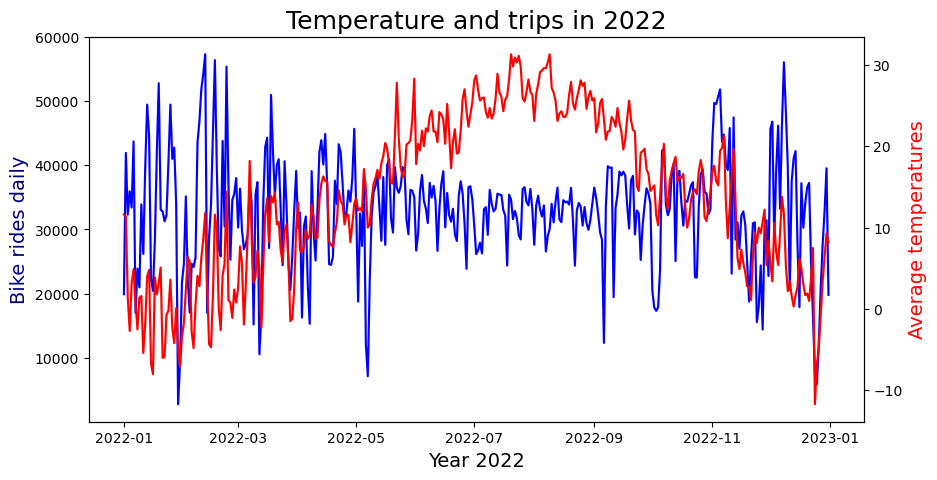

In [25]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_temp['bike_rides_daily'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily", color = "navy", fontsize = 14) # set y-axis label
ax2 = ax.twinx()
sns.lineplot(data = df_temp['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

# Box plots

In [27]:
df['rideable_type']

0            classic_bike
1            classic_bike
2            classic_bike
3            classic_bike
4            classic_bike
                ...      
11999374    electric_bike
11999375     classic_bike
11999376    electric_bike
11999377    electric_bike
11999378     classic_bike
Name: rideable_type, Length: 11999379, dtype: object

In [28]:
counts = df['rideable_type'].value_counts()

print(counts)

rideable_type
classic_bike     7067547
electric_bike    4931832
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_2608\990264754.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'rideable_type', y = 'avgTemp', data = df, palette = {'classic_bike': 'royalblue', 'electric_bike': 'orange'})


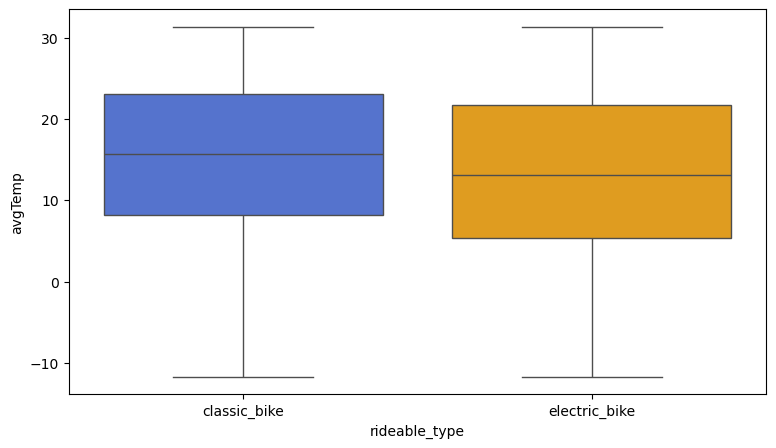

In [29]:
plt.figure(figsize=(9,5))
sns.boxplot(x = 'rideable_type', y = 'avgTemp', data = df, palette = {'classic_bike': 'royalblue', 'electric_bike': 'orange'})
plt.show()

### Based on this boxplot, we can observe a clear relationship between temperature and the type of bike people prefer. When the temperature is lower, there is a tendency for riders to choose electric bikes more frequently. This could be because electric bikes require less physical effort, making them more comfortable in colder weather when riders may want to minimize exertion and stay warmer.

### Conversely, as temperatures rise, there is an increase in the use of classic bikes. Warmer weather likely makes riding a classic bike more enjoyable and less strenuous, encouraging riders to opt for a more active and traditional biking experience. This pattern suggests that temperature influences rider preferences, possibly due to comfort, effort level, and the desire for a more leisurely or exercise-focused ride when the weather is pleasant.

### Overall, this insight can help bike-sharing services anticipate demand for different bike types across seasons and adjust fleet availability accordingly.

# FacetGrids

### By using FacetGrids, I will analyze the relationship between bike types and the Top 10 ride durations. This approach allows me to visualize how different types of bikes are used for varying lengths of trips, making it easier to identify patterns and preferences across the dataset.

In [33]:
# Convert the strings to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [34]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
value                          int64
bike_rides_daily               int64
merge_flag                  category
dtype: object

In [35]:
# Calculate ride duration (in minutes)
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [36]:
# Categorize rides into groups
def categorize_duration(duration):
    if duration < 5:
        return 'Less than 5 min'
    elif 5 <= duration <= 10:
        return '5 to 10 min'
    else:
        return 'Over 10 min'

df['duration_category'] = df['ride_duration'].apply(categorize_duration)

In [37]:
# Check result
print(df[['started_at', 'ended_at', 'ride_duration', 'duration_category']])

                      started_at                ended_at  ride_duration  \
0        2022-01-01 16:01:22.082 2022-01-01 16:05:11.986       3.831733   
1        2022-01-01 14:07:04.344 2022-01-01 14:31:57.500      24.885933   
2        2022-01-01 12:02:26.943 2022-01-01 12:14:13.555      11.776867   
3        2022-01-01 22:53:23.508 2022-01-01 23:18:42.881      25.322883   
4        2022-01-01 08:04:51.755 2022-01-01 08:08:07.290       3.258917   
...                          ...                     ...            ...   
11999374 2022-12-31 09:35:24.597 2022-12-31 09:39:31.409       4.113533   
11999375 2022-12-31 14:52:14.013 2022-12-31 14:54:49.607       2.593233   
11999376 2022-12-31 18:43:08.788 2022-12-31 19:10:20.978      27.203167   
11999377 2022-12-31 19:48:21.182 2022-12-31 19:50:22.154       2.016200   
11999378 2022-12-31 18:13:19.297 2022-12-31 18:19:11.314       5.866950   

         duration_category  
0          Less than 5 min  
1              Over 10 min  
2           

In [38]:
# Count rides in each category
category_counts = df['duration_category'].value_counts()
print(category_counts)

duration_category
Over 10 min        5930426
5 to 10 min        3622205
Less than 5 min    2446748
Name: count, dtype: int64


In [39]:
# round decimals to nearest whole number
df['ride_duration'] = df['ride_duration'].round(0).astype(int)

In [41]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,value,bike_rides_daily,merge_flag,ride_duration,duration_category
0,4A091640AEC83471,classic_bike,2022-01-01 16:01:22.082,2022-01-01 16:05:11.986,S 4 St & Wythe Ave,5204.05,Kent Ave & S 11 St,5062.01,40.712859,-73.965903,40.707645,-73.968415,member,2022-01-01,11.6,1,19905,both,4,Less than 5 min
1,7A560D6287C00126,classic_bike,2022-01-01 14:07:04.344,2022-01-01 14:31:57.500,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,2022-01-01,11.6,1,19905,both,25,Over 10 min
2,4F6F726B809C15E4,classic_bike,2022-01-01 12:02:26.943,2022-01-01 12:14:13.555,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,2022-01-01,11.6,1,19905,both,12,Over 10 min
3,3BC10DC94FD79955,classic_bike,2022-01-01 22:53:23.508,2022-01-01 23:18:42.881,Cleveland Pl & Spring St,5492.05,Mott St & Prince St,5561.04,40.722104,-73.997249,40.723180,-73.994800,member,2022-01-01,11.6,1,19905,both,25,Over 10 min
4,FE4CE7F1CFFD7952,classic_bike,2022-01-01 08:04:51.755,2022-01-01 08:08:07.290,Central Park North & Adam Clayton Powell Blvd,7617.07,E 110 St & Madison Ave,7587.14,40.799484,-73.955613,40.796154,-73.947821,member,2022-01-01,11.6,1,19905,both,3,Less than 5 min


In [76]:
# Count rides in each category
category_counts = df['ride_duration'].value_counts()
print(category_counts)

ride_duration
5        817375
6        806550
4        769892
7        762273
8        704568
          ...  
4564          1
1511          1
1892          1
29000         1
5589          1
Name: count, Length: 2311, dtype: int64


In [78]:
counts = df['ride_duration'].value_counts()

In [80]:
top_10_durations = counts.head(10)

In [82]:
print(top_10_durations)

ride_duration
5     817375
6     806550
4     769892
7     762273
8     704568
3     653170
9     640949
10    579451
11    520370
12    464002
Name: count, dtype: int64


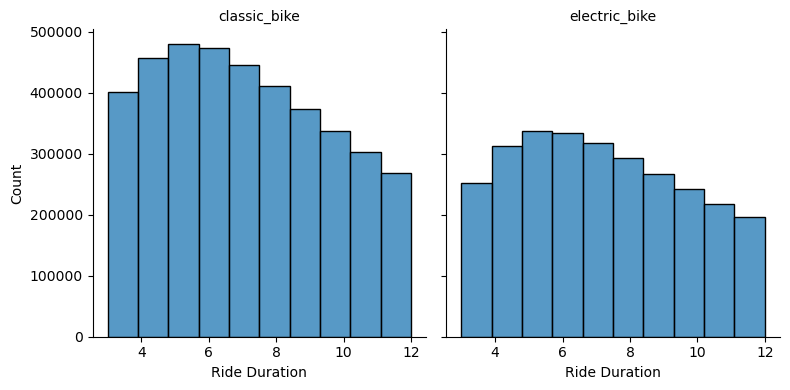

In [86]:
top_10 = df['ride_duration'].value_counts().nlargest(10).index
df_top10 = df[df['ride_duration'].isin(top_10)]
g = sns.FacetGrid(df_top10, col="rideable_type", col_wrap=2, height=4)
g.map_dataframe(sns.histplot, x="ride_duration", bins=10, kde=False)
g.set_axis_labels("Ride Duration", "Count")
g.set_titles(col_template="{col_name}")

plt.tight_layout()
plt.show()

## Shape of distribution
* Both types have a roughly bell-like distribution within the filtered top 10 durations.

* This means that for both classic and electric bikes, most rides cluster around mid-range durations around 5–7 minutes.

## Counts
* The counts are quite high, up to ~500,000 for classic bikes, slightly lower for electric bikes.

* This suggests classic bikes might be used more frequently overall, or have more rides that fall into these top durations.

## Differences between bike types
* Classic bikes: Slightly higher counts, with a similar spread of durations.

* Electric bikes: Fewer rides in total (in this top-10-duration window), but the shape is very similar.

This suggests that riders of both bike types tend to have similar preferred ride lengths.